In [3]:
import uncertainties as unc  
import uncertainties.unumpy as unumpy  
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

In [4]:
for P in ["P1","P2","P3"]:
    globals()['diff_data_'+P] = []
    error = [0.2,0.2]
    j=0
    for j in [1,3]:
        collumn = np.genfromtxt(P+".csv", delimiter=",", usecols=(j), skip_header=1, skip_footer=1)
        collumn = unumpy.uarray(collumn, std_devs = error[int(j/2)])
        globals()['diff_data_'+P].append(collumn)
    print(globals()['diff_data_'+P])

[array([11.2+/-0.2, 11.7+/-0.2, 11.5+/-0.2, 11.4+/-0.2], dtype=object), array([11.8+/-0.2, 11.5+/-0.2, 12.1+/-0.2, 11.3+/-0.2], dtype=object)]
[array([9.7+/-0.2, 11.5+/-0.2, 11.2+/-0.2, 11.9+/-0.2], dtype=object), array([11.9+/-0.2, 12.1+/-0.2, 11.5+/-0.2, 11.7+/-0.2], dtype=object)]
[array([11.6+/-0.2, 10.2+/-0.2, 10.7+/-0.2, 11.2+/-0.2], dtype=object), array([11.9+/-0.2, 11.4+/-0.2, 11.2+/-0.2, 11.8+/-0.2], dtype=object)]


In [5]:
mean_Volt_Array=[]
std_Volt_Array=[]
for P in ["diff_data_P1","diff_data_P2","diff_data_P3"] :
    for i in [0,1]:
        wmean = (np.average( unumpy.nominal_values(globals()[P][i]), weights = unumpy.std_devs(globals()[P][i]) ))
        werror = ((1/(len(globals()[P][i]) - 1) * sum ( (unumpy.nominal_values(globals()[P][i])-wmean)**2) )**0.5)
        mean_Volt_Array.append(wmean)
        std_Volt_Array.append(werror)
        globals()['mean_'+ str(i) + '_' + P] = unc.ufloat(wmean,werror)
        print('mean_'+ str(i) + '_'  + P + " : " + str(globals()['mean_'+ str(i) + '_' + P]))

mean_0_diff_data_P1 : 11.45+/-0.21
mean_1_diff_data_P1 : 11.67+/-0.35
mean_0_diff_data_P2 : 11.1+/-1.0
mean_1_diff_data_P2 : 11.80+/-0.26
mean_0_diff_data_P3 : 10.9+/-0.6
mean_1_diff_data_P3 : 11.58+/-0.33


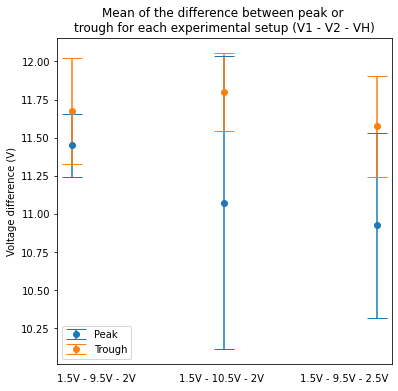

In [6]:
plt.figure(figsize=(6, 6))
y=[unumpy.nominal_values(globals()['mean_0_diff_data_P1']),unumpy.nominal_values(globals()['mean_0_diff_data_P2']),unumpy.nominal_values(globals()['mean_0_diff_data_P3'])]
y_err=[unumpy.std_devs(globals()['mean_0_diff_data_P1']),unumpy.std_devs(globals()['mean_0_diff_data_P2']),unumpy.std_devs(globals()['mean_0_diff_data_P3'])]
plt.errorbar([1,2,3],y,yerr=y_err,fmt='o',label='Peak',capsize=10)
y=[unumpy.nominal_values(globals()['mean_1_diff_data_P1']),unumpy.nominal_values(globals()['mean_1_diff_data_P2']),unumpy.nominal_values(globals()['mean_1_diff_data_P3'])]
y_err=[unumpy.std_devs(globals()['mean_1_diff_data_P1']),unumpy.std_devs(globals()['mean_1_diff_data_P2']),unumpy.std_devs(globals()['mean_1_diff_data_P3'])]
figure = plt.gca()
plt.errorbar([1,2,3],y,yerr=y_err,fmt='o',label='Trough',capsize=10)
x_axis = figure.axes.get_xaxis()
x_axis.set_visible(False)
plt.title('''Mean of the difference between peak or 
trough for each experimental setup (V1 - V2 - VH)''')
plt.legend(loc='lower left')
plt.text(0.9,9.9,'1.5V - 9.5V - 2V')
plt.text(1.7,9.9,'1.5V - 10.5V - 2V')
plt.text(2.5,9.9,'1.5V - 9.5V - 2.5V')
plt.ylabel('Voltage difference (V)')
plt.savefig('Plot1')
plt.show()

In [7]:
Plank=6.62607004 * 10**(-34) #m**2 kg / s
Argon_Energy=11.3 #eV = 1,6022e-19J (m^2 kg / s^2) 
Speed_Light=299792458 #m/s
Argon_Wavelength = 104.8 #nm

mean_Volt = (np.average( mean_Volt_Array, weights = std_Volt_Array ))
std_Volt = ((1/(len(mean_Volt_Array) - 1) * sum ( (mean_Volt_Array-mean_Volt)**2) )**0.5)
Volt = unc.ufloat(mean_Volt,std_Volt)
print(Volt)

11.3+/-0.4


In [8]:
#E = h c/l
#h = E/c *l
#l = hc/E
print((Volt*1.6022*10**(-19)) * (108*10**-9) / Speed_Light)

8.138991661410485e-21
